In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
import h5py

In [113]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH10k_TDE/"

TDE_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    TDE_phot_fn = transDir + "MLAG_GP_SCOTCH10k_Z3_MXINTFLUX_NONIaMODEL0-{:s}_PHOT.FITS.gz".format(selection)
    TDE_head = table.Table.read(TDE_head_fn, format='fits').to_pandas()
    TDE_heads.append(TDE_head)

In [117]:
len(TDE_heads[0])

250

In [121]:
TDE = pd.concat(TDE_heads)

In [122]:
for col in TDE.columns:
    if 'HOSTGAL' in col:
        print(col)

HOSTGAL_NMATCH
HOSTGAL_NMATCH2
HOSTGAL_OBJID
HOSTGAL_FLAG
HOSTGAL_PHOTOZ
HOSTGAL_PHOTOZ_ERR
HOSTGAL_SPECZ
HOSTGAL_SPECZ_ERR
HOSTGAL_RA
HOSTGAL_DEC
HOSTGAL_SNSEP
HOSTGAL_DDLR
HOSTGAL_CONFUSION
HOSTGAL_LOGMASS
HOSTGAL_LOGMASS_ERR
HOSTGAL_LOGSFR
HOSTGAL_LOGSFR_ERR
HOSTGAL_LOGsSFR
HOSTGAL_LOGsSFR_ERR
HOSTGAL_COLOR
HOSTGAL_COLOR_ERR
HOSTGAL_ELLIPTICITY
HOSTGAL_OBJID2
HOSTGAL_SQRADIUS
HOSTGAL_OBJID_UNIQUE
HOSTGAL_ZPHOT_Q000
HOSTGAL_ZPHOT_Q010
HOSTGAL_ZPHOT_Q020
HOSTGAL_ZPHOT_Q030
HOSTGAL_ZPHOT_Q040
HOSTGAL_ZPHOT_Q050
HOSTGAL_ZPHOT_Q060
HOSTGAL_ZPHOT_Q070
HOSTGAL_ZPHOT_Q080
HOSTGAL_ZPHOT_Q090
HOSTGAL_ZPHOT_Q100
HOSTGAL_MAG_u
HOSTGAL_MAG_g
HOSTGAL_MAG_r
HOSTGAL_MAG_i
HOSTGAL_MAG_z
HOSTGAL_MAG_Y
HOSTGAL_MAGERR_u
HOSTGAL_MAGERR_g
HOSTGAL_MAGERR_r
HOSTGAL_MAGERR_i
HOSTGAL_MAGERR_z
HOSTGAL_MAGERR_Y
HOSTGAL2_OBJID
HOSTGAL2_FLAG
HOSTGAL2_PHOTOZ
HOSTGAL2_PHOTOZ_ERR
HOSTGAL2_SPECZ
HOSTGAL2_SPECZ_ERR
HOSTGAL2_RA
HOSTGAL2_DEC
HOSTGAL2_SNSEP
HOSTGAL2_DDLR
HOSTGAL2_LOGMASS
HOSTGAL2_LOGMASS_ERR
HOSTGAL2_LO

In [123]:
c2 = SkyCoord(TDE['HOSTGAL_RA'].values*u.deg, TDE['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_tde = c1.separation(c2)

In [124]:
redshift_tde = np.asarray(TDE['HOSTGAL_SPECZ'])
sep_phys_tde = cosmo.kpc_proper_per_arcmin(redshift_tde)*sep_tde.to(u.arcmin)
tde_hostgal_rad = TDE['HOSTGAL_SQRADIUS']

Text(0.5, 0, 'Separation in kpc proper')

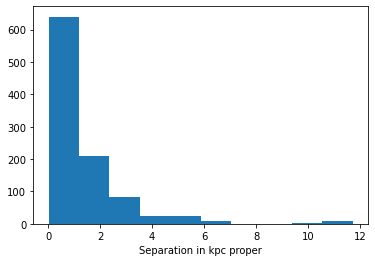

In [126]:
plt.hist(sep_phys_tde.value)
plt.xlabel("Separation in kpc proper")

Text(0.5, 0, 'Separation in arcsec')

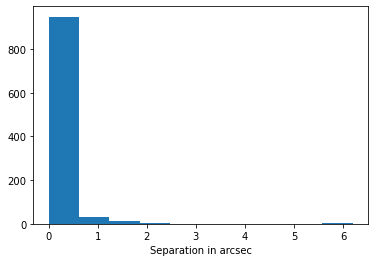

In [127]:
plt.hist(sep_tde.to(u.arcsec).value)
plt.xlabel("Separation in arcsec")

In [129]:
# compare with a more typical transient from SCOTCH
f    = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_z3.hdf5", "a")

In [130]:
slsn.keys()

<KeysViewHDF5 ['GID', 'MJD', 'TID', 'cadence', 'dec_off', 'mag_Y', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_z', 'ra_off', 'sep', 'z']>

In [131]:
slsn = f['TransientTable']['SLSN-I']['SLSN-I']
sep_slsn  = list(slsn['sep'][0:1000])
redshift_slsn    = list(slsn['z'][0:1000])

In [132]:
sep_phys_slsn = cosmo.kpc_proper_per_arcmin(redshift_slsn).to(u.kpc/u.arcsec)*sep_slsn*u.arcsec

Text(0.5, 0, 'Separation in kpc proper')

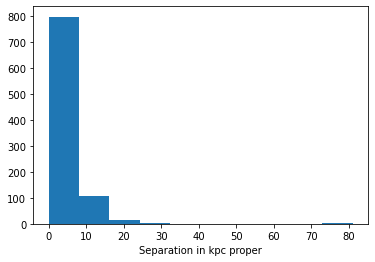

In [133]:
plt.hist(sep_phys_slsn.value)
plt.xlabel("Separation in kpc proper")

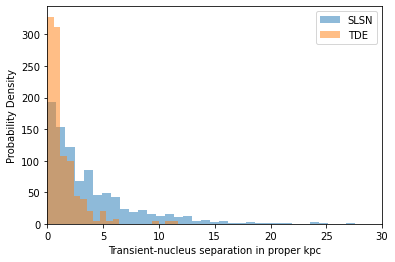

In [139]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=100)
plt.hist(sep_phys_tde.value, label='TDE', alpha=.5, bins=20)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,30])
plt.legend()